[Reference](https://medium.com/the-modern-scientist/integrating-fuzzy-logic-with-neural-networks-a-python-implementation-for-advanced-machine-learning-b0f59d8466dd)

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=68c05723aaea8619a72bc7c2a49e01d99cd5e135b79271b5cf3e9d58c053855c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6530
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5777
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5062
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4436
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3918
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3367
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2860
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2462
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2293
Epoch 13/100
8/8 [==============================] - 0s 2ms/st

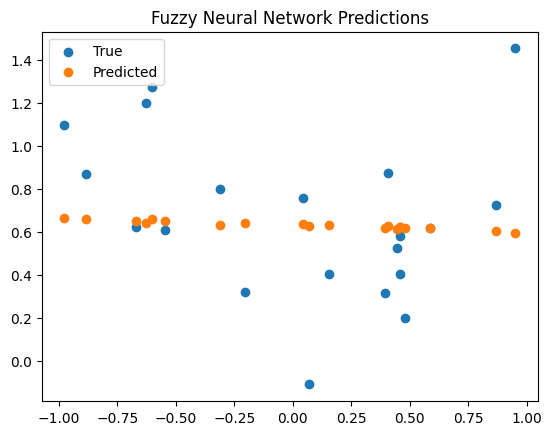

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model

# Generate synthetic data
np.random.seed(0)
X = np.random.uniform(-1, 1, (100, 2))  # 100 samples, 2 features
y = X[:, 0]**2 + X[:, 1]**2 + np.random.normal(0, 0.1, 100)  # Quadratic function with noise

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Custom Fuzzy Layer
class FuzzyLayer(Layer):
    def __init__(self, output_dim, **kwargs):
        super(FuzzyLayer, self).__init__(**kwargs)
        self.output_dim = output_dim

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)

    def call(self, x):
        return tf.math.sigmoid(tf.matmul(x, self.kernel))

# Neural Network Model
input_layer = Input(shape=(2,))
fuzzy_layer = FuzzyLayer(10)(input_layer)
hidden_layer = Dense(10, activation='relu')(fuzzy_layer)
output_layer = Dense(1)(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
predictions = model.predict(X_test)
mse = np.mean((y_test - predictions.flatten())**2)
print("Mean Squared Error:", mse)

# Plotting results
plt.scatter(X_test[:,0], y_test, label='True')
plt.scatter(X_test[:,0], predictions, label='Predicted')
plt.legend()
plt.title("Fuzzy Neural Network Predictions")
plt.show()